## IMDB Reviews Datasets

## Import library

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

c:\Users\BACHLONG\anaconda3\envs\tensorflow-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [5]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s,k in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Preprocessing

In [6]:
vocab_size = 10000
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

## Plot Utility

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## Model 1: Flatten

In [10]:
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 11526     
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, 
                            training_labels_final,
                            epochs=NUM_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 2s 5ms/step - loss: 0.6245 - accuracy: 0.6388 - val_loss: 0.9523 - val_accuracy: 0.5250
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.3208 - accuracy: 0.8675 - val_loss: 1.5757 - val_accuracy: 0.4919
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1927 - accuracy: 0.9328 - val_loss: 1.9221 - val_accuracy: 0.4984
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 0.1004 - accuracy: 0.9762 - val_loss: 2.4249 - val_accuracy: 0.4994
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9953 - val_loss: 2.7432 - val_accuracy: 0.5000
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9992 - val_loss: 3.2592 - val_accuracy: 0.4999
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9998 - val_loss: 3.5065 - val_accuracy: 0.5000
Epoch 

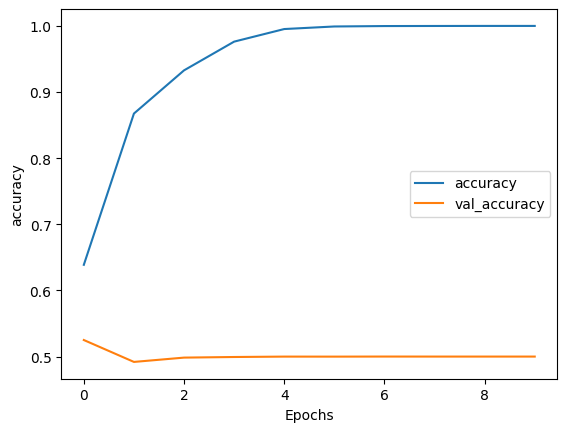

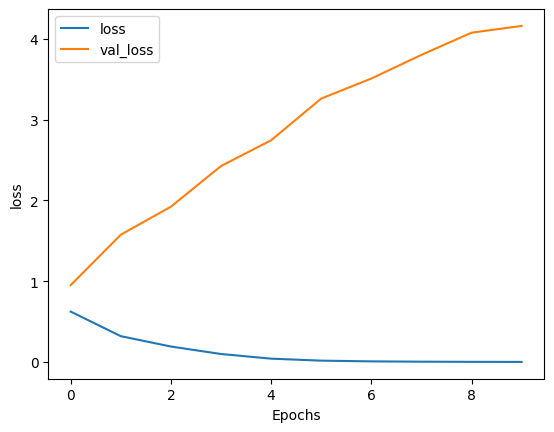

In [15]:
plot_graphs(history=history_flatten, string='accuracy')
plot_graphs(history=history_flatten, string='loss')

## Model 2: LSTM

In [ ]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6